In [1]:
import sys
#sys.path.append("/home/fehrdelt/data_ssd/MedicalImaging_GIN/gradient_boosting")
#sys.path.append("/home/fehrdelt/data_ssd/MedicalImaging_GIN/gradient_boosting")

import os
#import lightgbm as lgb
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

from sklearn.manifold import TSNE
import umap

import matplotlib.pyplot as plt

import shap




/home/theotime/Documents/general_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#DATA_DIRECTORY = "/home/fehrdelt/data_ssd/data/clinical_data/Full/"
#DATA_DIRECTORY = "C:\\Users\\Rivage\\Documents\\1\\programmation\\PFE\\clinical_data\\Full\\"


#DATA_DIRECTORY = "/home/theotime/Documents/PFE_data/clinical_data/Full/"
DATA_DIRECTORY = "/home/theotime/Documents/PFE_data/clinical_data/Full_zones_mises_a_jour/"

In [3]:
X_volumes_clinical = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(2,31))
X_volumes_clinical.head()

,supratentorial_IPH,supratentorial_SAH,supratentorial_Petechiae,supratentorial_Edema,infratentorial_IPH,infratentorial_SAH,infratentorial_Petechiae,infratentorial_Edema,brainstem_IPH,brainstem_SAH,...,pression_arterielle_diastolique_PAD_arrivee_du_smur,score_glasgow_initial,score_glasgow_moteur_initial,anomalie_pupillaire_prehospitalier,frequence_cardiaque_FC_arrivee_du_smur,arret_cardio_respiratoire_massage,penetrant_objet,ischemie_du_membre,hemorragie_externe,amputation
0,0,342,0,0,0,15,0,0,0,0,...,49.0,15.0,6.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,60.0,15.0,6.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
2,0,101,0,0,0,0,0,0,0,0,...,64.0,14.0,6.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0
3,0,328,0,0,0,0,0,0,0,0,...,71.0,15.0,6.0,0.0,107.0,0.0,0.0,0.0,0.0,0.0
4,0,9,0,15,0,0,0,0,0,0,...,79.0,NaN,NaN,0.0,83.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_volumes_only = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(2,16))
X_volumes_only.head()

,supratentorial_IPH,supratentorial_SAH,supratentorial_Petechiae,supratentorial_Edema,infratentorial_IPH,infratentorial_SAH,infratentorial_Petechiae,infratentorial_Edema,brainstem_IPH,brainstem_SAH,brainstem_Petechiae,brainstem_Edema,SDH,EDH
0,0,342,0,0,0,15,0,0,0,0,0,0,43,0
1,0,0,0,0,0,0,0,0,0,0,0,0,312,11685
2,0,101,0,0,0,0,0,0,0,0,0,0,11,0
3,0,328,0,0,0,0,0,0,0,0,0,0,796,0
4,0,9,0,15,0,0,0,0,0,0,0,0,253,0


In [5]:
X_clinical_only = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(16,31))
X_clinical_only.head()

,age,hemocue_initial,fracas_du_bassin,catecholamines,pression_arterielle_systolique_PAS_arrivee_du_smur,pression_arterielle_diastolique_PAD_arrivee_du_smur,score_glasgow_initial,score_glasgow_moteur_initial,anomalie_pupillaire_prehospitalier,frequence_cardiaque_FC_arrivee_du_smur,arret_cardio_respiratoire_massage,penetrant_objet,ischemie_du_membre,hemorragie_externe,amputation
0,52.0,NaN,0.0,0.0,87.0,49.0,15.0,6.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
1,23.0,NaN,0.0,0.0,100.0,60.0,15.0,6.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
2,42.0,13.1,0.0,0.0,101.0,64.0,14.0,6.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0
3,34.0,15.8,0.0,0.0,110.0,71.0,15.0,6.0,0.0,107.0,0.0,0.0,0.0,0.0,0.0
4,22.0,NaN,0.0,0.0,114.0,79.0,NaN,NaN,0.0,83.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=[31])
y.head()

,outcome_neurochir_pic
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Drop rows where there is no outcome and impute missing values by median

In [7]:
nan_indexes = y.loc[pd.isna(y["outcome_neurochir_pic"]), :].index # indexes where there is a nan value.
print(nan_indexes)

y = y.dropna()
X_volumes_clinical = X_volumes_clinical.drop(nan_indexes)
X_clinical_only = X_clinical_only.drop(nan_indexes)
X_volumes_only = X_volumes_only.drop(nan_indexes)


Index([76, 102, 104, 113, 118, 125], dtype='int64')


In [8]:
imp = SimpleImputer(missing_values=np.nan, strategy="median")

imp.fit(X_volumes_clinical)
X_volumes_clinical = imp.transform(X_volumes_clinical)

imp.fit(X_clinical_only)
X_clinical_only = imp.transform(X_clinical_only)

imp.fit(X_volumes_only)
X_volumes_only = imp.transform(X_volumes_only)

In [9]:
print(len(y))
print(len(X_volumes_clinical))
nb_total_samples = len(X_volumes_clinical)

495
495


In [10]:
y = y['outcome_neurochir_pic'].to_numpy()
y = [int(i) for i in y]

In [11]:
print(np.sum(y))
print(len(y)-np.sum(y))

42
453


In [12]:
N_FOLDS = 5
N_REPEATS = 3

In [13]:
print(len([False]*14 + [False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))
idx_categorical_features_clinical_only = [2, 3, 8, 10, 11, 12, 13, 14]
idx_categorical_features_volumes_clinical = [i+14 for i in idx_categorical_features_clinical_only]

29


#### Nested cross validation

In [14]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix

ftwo_scorer = make_scorer(fbeta_score, beta=2)

def confusion_matrix_scorer(clf, X, y):

     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)

     return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

def false_neg_scorer(clf, X, y):

     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     
     return cm[1, 0]

def false_pos_scorer(clf, X, y):

     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     
     return cm[0, 1]

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [16]:
X_volumes_clinical = pd.DataFrame(data=X_volumes_clinical, columns=pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(2,31)).columns)
X_volumes_only = pd.DataFrame(data=X_volumes_clinical, columns=pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(2,16)).columns)
X_clinical_only = pd.DataFrame(data=X_volumes_clinical, columns=pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(16,31)).columns)

In [17]:
y = pd.DataFrame(data=y, columns=["neurochir_or_ipc"])

https://towardsdatascience.com/using-shap-with-cross-validation-d24af548fadc

#### Volumes only

In [18]:
random_states = np.random.randint(10000, size=N_REPEATS) 
param_grid = {"model__learning_rate": [0.01, 0.05, 0.1, 0.5, 1], "over__sampling_strategy": [0.1, 0.2, 0.3], "under__sampling_strategy":[0.3, 0.5, 0.7]}


chosen_data = X_volumes_only # <--


shap_values_per_cv = dict()
for sample in chosen_data.index:
    shap_values_per_cv[sample] = {}

for i, CV_repeat in enumerate(range(N_REPEATS)): 
    #Verbose 
    print('\n------------ CV Repeat number:', CV_repeat)
    #Establish CV scheme
    CV = KFold(n_splits=N_FOLDS, shuffle=True, random_state=random_states[i]) # Set random state 

    ix_training, ix_test = [], []
    # Loop through each fold and append the training & test indices to the empty lists above
    for fold in CV.split(chosen_data):
        ix_training.append(fold[0]), ix_test.append(fold[1])
        
    ## Loop through each outer fold and extract SHAP values 
    for j, (train_outer_ix, test_outer_ix) in enumerate(zip(ix_training, ix_test)): 
        #Verbose
        print('\n------ Fold Number:',j)
        X_train, X_test = chosen_data.iloc[train_outer_ix, :], chosen_data.iloc[test_outer_ix, :]
        y_train, y_test = y.iloc[train_outer_ix], y.iloc[test_outer_ix]
        y_train = y_train.values.ravel()
        y_test = y_test.values.ravel()
        
        ## Establish inner CV for parameter optimization #-#-#
        cv_inner = KFold(n_splits=3, shuffle=True, random_state=1) #-#-#
        #TODO: vaut pas mieux mettre StratifiedKFold ici ?
        
        # Search to optimize hyperparameters
        # volumes & clinical:
        #pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False]*14+[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))])
        # volumes only:
        pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False]*14))])
        # clinical only:
        #pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))])
        
        
        search = GridSearchCV(pipeline_smote_under, param_grid, scoring={'F2':ftwo_scorer}, refit='F2', cv=cv_inner) #-#-#
        result = search.fit(X_train, y_train) #-#=#

        # Fit model on training data 
        result.best_estimator_.fit(X_train, y_train) #-#-#
    
        # Use SHAP to explain predictions using best estimator 
        explainer = shap.TreeExplainer(result.best_estimator_.named_steps['model']) 
        shap_values = explainer.shap_values(X_test)
        #print(shap_values)

        # Extract SHAP information per fold per sample 
        for l, test_index in enumerate(test_outer_ix):
            #print("shap values per cv")
            #print(shap_values_per_cv)
            shap_values_per_cv[test_index][CV_repeat] = shap_values[l] 


------------ CV Repeat number: 0

------ Fold Number: 0

------ Fold Number: 1


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 2


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 3


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 4

------------ CV Repeat number: 1

------ Fold Number: 0


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 1


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 2


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 3


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 4


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------------ CV Repeat number: 2

------ Fold Number: 0


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 1

------ Fold Number: 2


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 3


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 4


In [19]:
# Establish lists to keep average Shap values, their Stds, and their min and max
average_shap_values, stds, ranges = [],[],[]

for i in range(0,len(chosen_data)):
    df_per_obs = pd.DataFrame.from_dict(shap_values_per_cv[i]) # Get all SHAP values for sample number i
    # Get relevant statistics for every sample 
    average_shap_values.append(df_per_obs.mean(axis=1).values) 
    stds.append(df_per_obs.std(axis=1).values)
    ranges.append(df_per_obs.max(axis=1).values-df_per_obs.min(axis=1).values)

Text(0.5, 1.0, 'Volumes only - Average SHAP values after cross-validation')

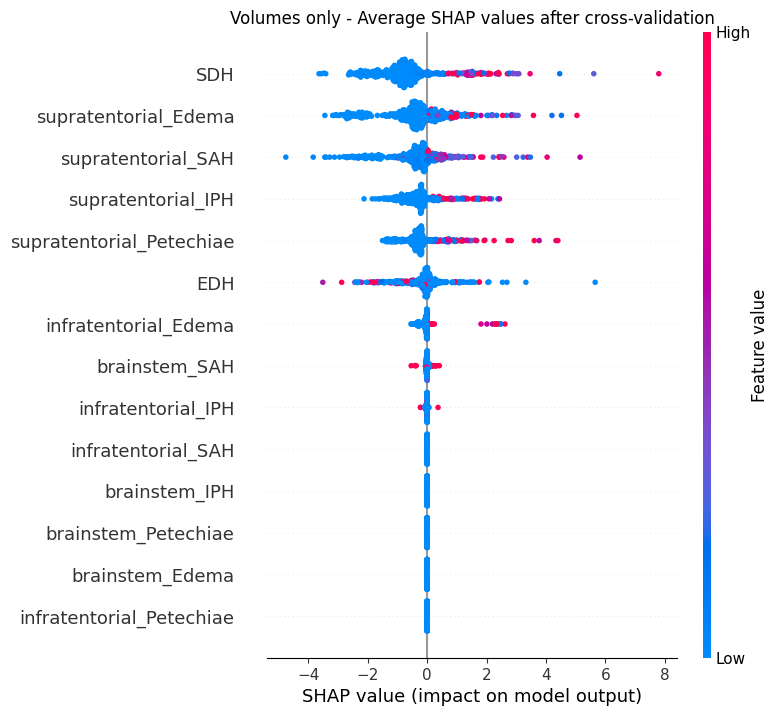

In [20]:
shap.summary_plot(np.array(average_shap_values), chosen_data, show = False)
plt.title('Volumes only - Average SHAP values after cross-validation')

#### Clinical only

In [21]:
print(np.sum(X_clinical_only["ischemie_du_membre"]))

7.0


In [22]:
random_states = np.random.randint(10000, size=N_REPEATS) 
param_grid = {"model__learning_rate": [0.01, 0.05, 0.1, 0.5, 1], "over__sampling_strategy": [0.1, 0.2, 0.3], "under__sampling_strategy":[0.3, 0.5, 0.7]}
#param_grid = {"model__learning_rate": [0.01, 0.05, 0.1, 0.5, 1], "under__sampling_strategy":[0.3, 0.5, 0.7]}


chosen_data = X_clinical_only # <--


shap_values_per_cv = dict()
for sample in chosen_data.index:
    shap_values_per_cv[sample] = {}

for i, CV_repeat in enumerate(range(N_REPEATS)): 
    #Verbose 
    print('\n------------ CV Repeat number:', CV_repeat)
    #Establish CV scheme
    CV = KFold(n_splits=N_FOLDS, shuffle=True, random_state=random_states[i]) # Set random state 

    ix_training, ix_test = [], []
    # Loop through each fold and append the training & test indices to the empty lists above
    for fold in CV.split(chosen_data):
        ix_training.append(fold[0]), ix_test.append(fold[1])
        
    ## Loop through each outer fold and extract SHAP values 
    for j, (train_outer_ix, test_outer_ix) in enumerate(zip(ix_training, ix_test)): 
        #Verbose
        print('\n------ Fold Number:',j)
        X_train, X_test = chosen_data.iloc[train_outer_ix, :], chosen_data.iloc[test_outer_ix, :]
        y_train, y_test = y.iloc[train_outer_ix], y.iloc[test_outer_ix]
        y_train = y_train.values.ravel()
        y_test = y_test.values.ravel()
        
        ## Establish inner CV for parameter optimization #-#-#
        cv_inner = KFold(n_splits=3, shuffle=True, random_state=1) #-#-#
        #TODO: vaut pas mieux mettre StratifiedKFold ici ?
        
        # Search to optimize hyperparameters
        # volumes & clinical:
        #pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False]*14+[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))])
        # volumes only:
        #pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False]*14))])
        # clinical only:
        #pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))])
        pipeline_smote_under = Pipeline(steps=[('over', SMOTENC(categorical_features=["fracas_du_bassin", "catecholamines", "anomalie_pupillaire_prehospitalier", "arret_cardio_respiratoire_massage", "penetrant_objet", "ischemie_du_membre", "hemorragie_externe", "amputation"], sampling_strategy=0.1)), ('under',RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier())])
        #TODO: ICI C'EST SANS PRECISER AU MODEL QU'IL Y A DES VARIABLES CATEGORIQUES
        
        search = GridSearchCV(pipeline_smote_under, param_grid, scoring={'F2':ftwo_scorer}, refit='F2', cv=cv_inner) #-#-#
        result = search.fit(X_train, y_train) #-#=#

        # Fit model on training data 
        result.best_estimator_.fit(X_train, y_train) #-#-#
    
        # Use SHAP to explain predictions using best estimator 
        explainer = shap.TreeExplainer(result.best_estimator_.named_steps['model']) 
        shap_values = explainer.shap_values(X_test)
        #print(shap_values)

        # Extract SHAP information per fold per sample 
        for l, test_index in enumerate(test_outer_ix):
            #print("shap values per cv")
            #print(shap_values_per_cv)
            shap_values_per_cv[test_index][CV_repeat] = shap_values[l] 


------------ CV Repeat number: 0

------ Fold Number: 0


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 1


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 2


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 3


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 4

------------ CV Repeat number: 1

------ Fold Number: 0


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 1


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 2


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 3


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 4

------------ CV Repeat number: 2

------ Fold Number: 0


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 1

------ Fold Number: 2


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 3

------ Fold Number: 4


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/

In [23]:
# Establish lists to keep average Shap values, their Stds, and their min and max
average_shap_values, stds, ranges = [],[],[]

for i in range(0,len(chosen_data)):
    df_per_obs = pd.DataFrame.from_dict(shap_values_per_cv[i]) # Get all SHAP values for sample number i
    # Get relevant statistics for every sample 
    average_shap_values.append(df_per_obs.mean(axis=1).values) 
    stds.append(df_per_obs.std(axis=1).values)
    ranges.append(df_per_obs.max(axis=1).values-df_per_obs.min(axis=1).values)

Text(0.5, 1.0, 'Clinical only - Average SHAP values after cross-validation')

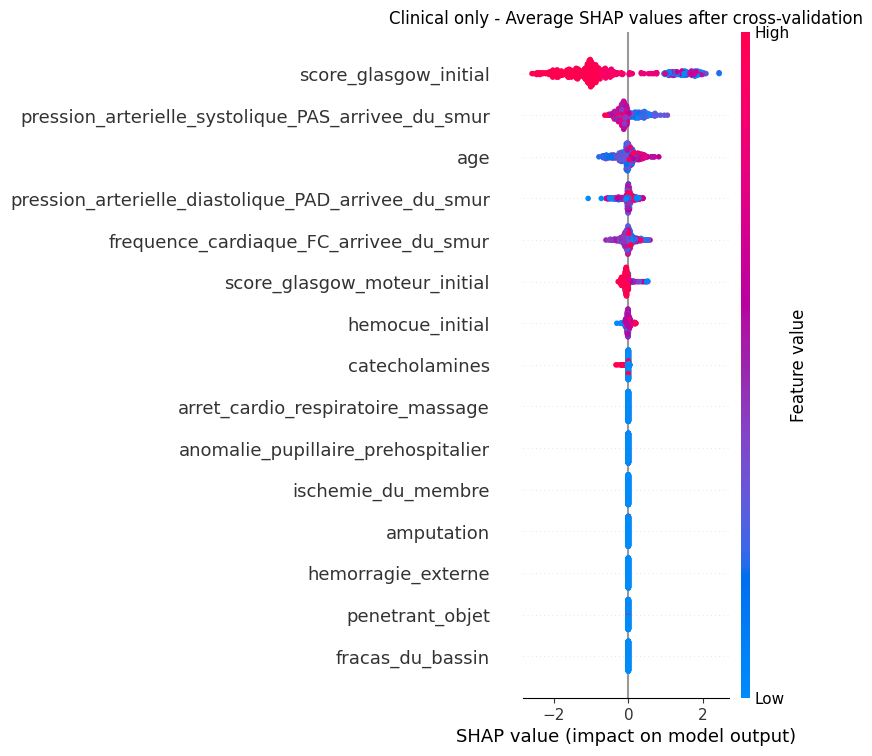

In [24]:
shap.summary_plot(np.array(average_shap_values), chosen_data, show = False)
plt.title('Clinical only - Average SHAP values after cross-validation')

#### Volumes & clinical data

In [25]:
random_states = np.random.randint(10000, size=N_REPEATS) 
param_grid = {"model__learning_rate": [0.01, 0.05, 0.1, 0.5, 1], "over__sampling_strategy": [0.1, 0.2, 0.3], "under__sampling_strategy":[0.3, 0.5, 0.7]}


chosen_data = X_volumes_clinical # <--


shap_values_per_cv = dict()
for sample in chosen_data.index:
    shap_values_per_cv[sample] = {}

for i, CV_repeat in enumerate(range(N_REPEATS)): 
    #Verbose 
    print('\n------------ CV Repeat number:', CV_repeat)
    #Establish CV scheme
    CV = KFold(n_splits=N_FOLDS, shuffle=True, random_state=random_states[i]) # Set random state 

    ix_training, ix_test = [], []
    # Loop through each fold and append the training & test indices to the empty lists above
    for fold in CV.split(chosen_data):
        ix_training.append(fold[0]), ix_test.append(fold[1])
        
    ## Loop through each outer fold and extract SHAP values 
    for j, (train_outer_ix, test_outer_ix) in enumerate(zip(ix_training, ix_test)): 
        #Verbose
        print('\n------ Fold Number:',j)
        X_train, X_test = chosen_data.iloc[train_outer_ix, :], chosen_data.iloc[test_outer_ix, :]
        y_train, y_test = y.iloc[train_outer_ix], y.iloc[test_outer_ix]
        y_train = y_train.values.ravel()
        y_test = y_test.values.ravel()
        
        ## Establish inner CV for parameter optimization #-#-#
        cv_inner = KFold(n_splits=3, shuffle=True, random_state=1) #-#-#
        #TODO: vaut pas mieux mettre StratifiedKFold ici ?
        
        # Search to optimize hyperparameters
        # volumes & clinical:
        #pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False]*14+[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))])
        pipeline_smote_under = Pipeline(steps=[('over', SMOTENC(categorical_features=["fracas_du_bassin", "catecholamines", "anomalie_pupillaire_prehospitalier", "arret_cardio_respiratoire_massage", "penetrant_objet", "ischemie_du_membre", "hemorragie_externe", "amputation"], sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier())])
        # volumes only:
        #pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False]*14))])
        # clinical only:
        #pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))])
        
        
        search = GridSearchCV(pipeline_smote_under, param_grid, scoring={'F2':ftwo_scorer}, refit='F2', cv=cv_inner) #-#-#
        result = search.fit(X_train, y_train) #-#=#

        # Fit model on training data 
        result.best_estimator_.fit(X_train, y_train) #-#-#
    
        # Use SHAP to explain predictions using best estimator 
        explainer = shap.TreeExplainer(result.best_estimator_.named_steps['model']) 
        shap_values = explainer.shap_values(X_test)
        shap_values2 = explainer(X_test)

        # Extract SHAP information per fold per sample 
        for l, test_index in enumerate(test_outer_ix):
            #print("shap values per cv")
            #print(shap_values_per_cv)
            shap_values_per_cv[test_index][CV_repeat] = shap_values[l] 


------------ CV Repeat number: 0

------ Fold Number: 0


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 1


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 2

------ Fold Number: 3

------ Fold Number: 4


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------------ CV Repeat number: 1

------ Fold Number: 0


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 1

------ Fold Number: 2


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 3

------ Fold Number: 4

------------ CV Repeat number: 2

------ Fold Number: 0

------ Fold Number: 1


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 2


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 3


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/lib/


------ Fold Number: 4


In [26]:
# Establish lists to keep average Shap values, their Stds, and their min and max
average_shap_values, stds, ranges = [],[],[]

for i in range(0,len(chosen_data)):
    df_per_obs = pd.DataFrame.from_dict(shap_values_per_cv[i]) # Get all SHAP values for sample number i
    # Get relevant statistics for every sample 
    average_shap_values.append(df_per_obs.mean(axis=1).values) 
    stds.append(df_per_obs.std(axis=1).values)
    ranges.append(df_per_obs.max(axis=1).values-df_per_obs.min(axis=1).values)

Text(0.5, 1.0, 'Clinical & Volumes - Average SHAP values after cross-validation')

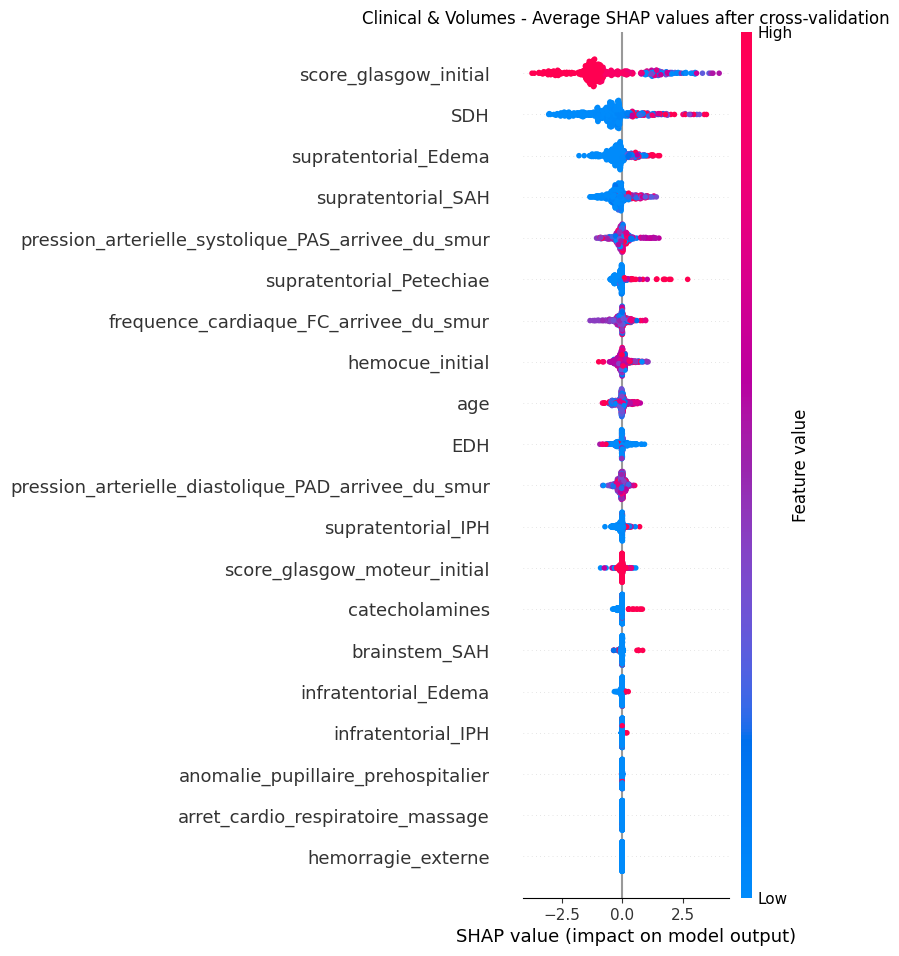

In [27]:
shap.summary_plot(np.array(average_shap_values), chosen_data, show = False)
plt.title('Clinical & Volumes - Average SHAP values after cross-validation')

In [28]:
for i in range(len(y_test)):
    if y_test[i]==1:
        print(f"index: {i}")

index: 33
index: 43
index: 65
index: 67
index: 72
index: 76
index: 77
index: 85
index: 90
index: 96


#### Single prediction explanation

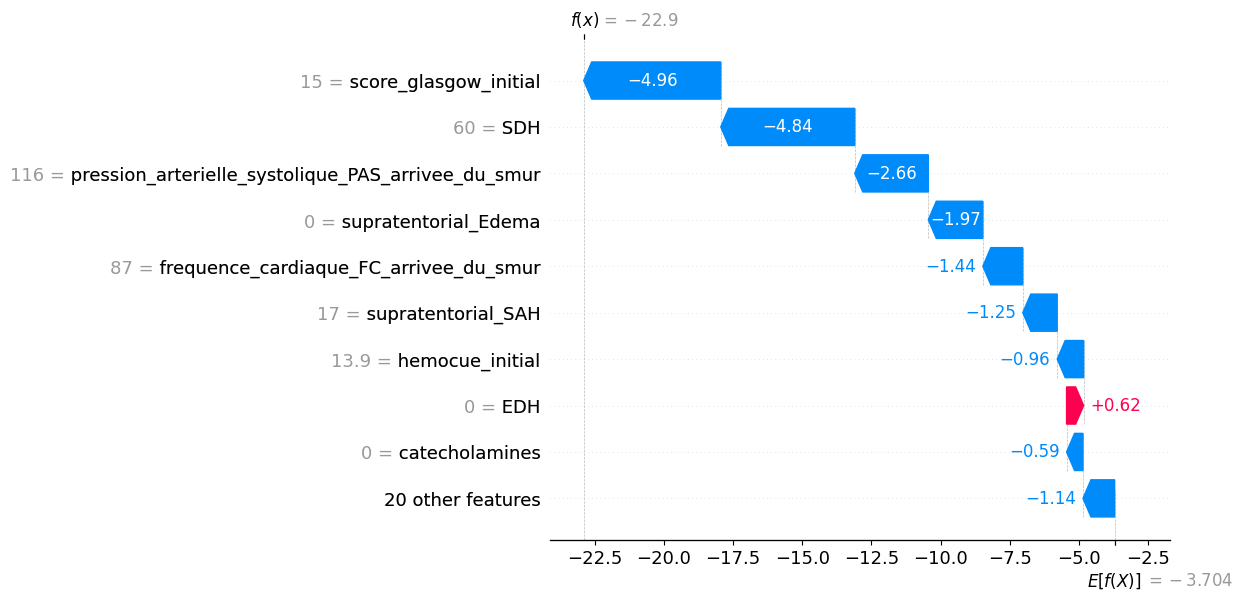

ground truth: 0


In [29]:
# le 17, 21, 86
n = 86
shap.plots.waterfall(shap_values2[n])
print(f"ground truth: {y_test[n]}")


#### Interation between features

In [108]:
shap_interaction_values = shap.TreeExplainer(result.best_estimator_.named_steps['model']).shap_interaction_values(X_volumes_clinical)

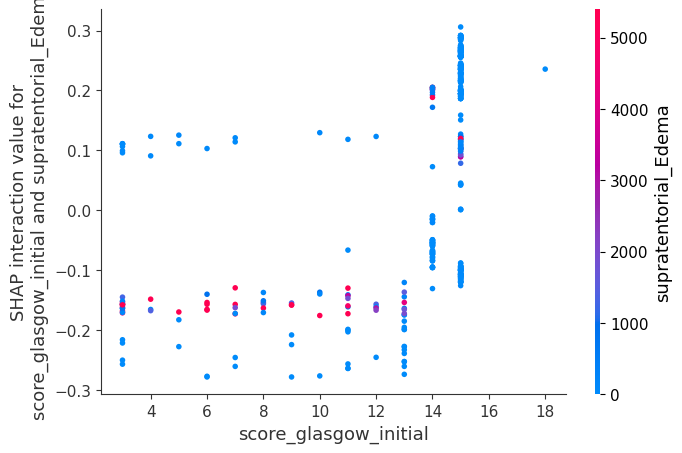

In [109]:
shap.dependence_plot(
    ("score_glasgow_initial", "supratentorial_Edema"),
    shap_interaction_values, X_volumes_clinical,
    display_features=X_volumes_clinical
)

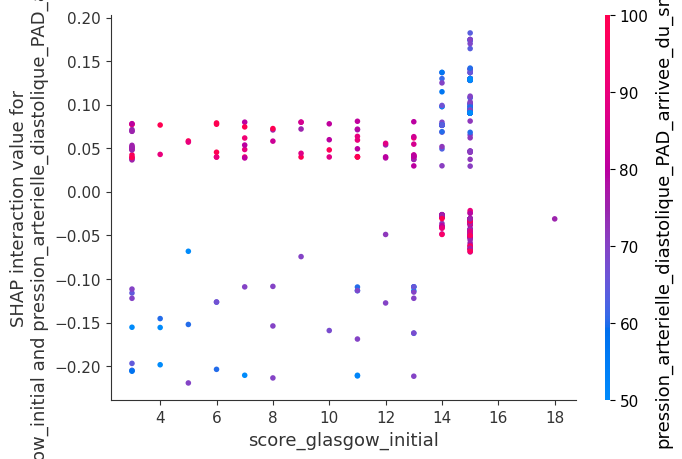

In [113]:
shap.dependence_plot(
    ("score_glasgow_initial", "pression_arterielle_diastolique_PAD_arrivee_du_smur"),
    shap_interaction_values, X_volumes_clinical,
    display_features=X_volumes_clinical
)

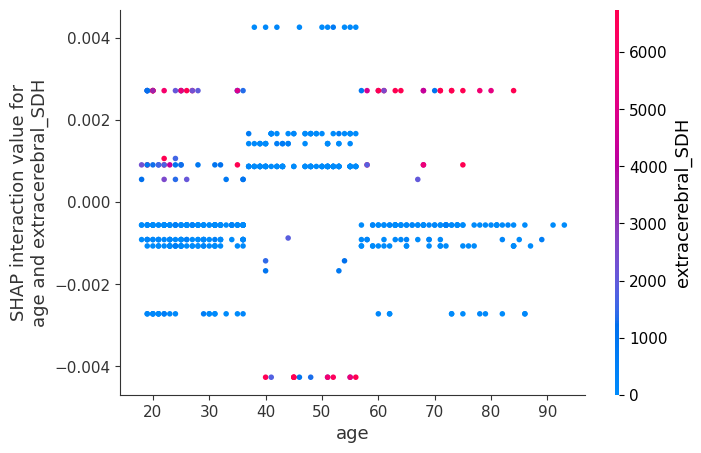

In [111]:
shap.dependence_plot(
    ("age", "extracerebral_SDH"),
    shap_interaction_values, X_volumes_clinical,
    display_features=X_volumes_clinical
)

#### Bootstrap confidence intervals

https://sebastianraschka.com/blog/2022/confidence-intervals-for-ml.html

In [ ]:
clf.fit(X_train, y_train)

predictions_test = clf.predict(X_test)
acc_test = np.mean(predictions_test == y_test)

rng = np.random.RandomState(seed=12345)
idx = np.arange(y_test.shape[0])

test_accuracies = []

for i in range(200):

    pred_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    acc_test_boot = np.mean(predictions_test[pred_idx] == y_test[pred_idx])
    test_accuracies.append(acc_test_boot)

bootstrap_train_mean = np.mean(test_accuracies)
print(bootstrap_train_mean)


In [ ]:
ci_lower = np.percentile(test_accuracies, 2.5)
ci_upper = np.percentile(test_accuracies, 97.5)

print(ci_lower, ci_upper)
